# World Population from the UN population estimates

United Nations data is available for download at 
https://population.un.org/wpp/Download/Standard/Population/
    
There are a number of XLS format files available. In this example, we'll look only at population data broken down by male/female and by age group.
The files we'll be using are:
- WPP2019_POP_F08_1_TOTAL_POPULATION_BY_BROAD_AGE_GROUP_BOTH_SEXES.xlsx
- WPP2019_POP_F08_2_TOTAL_POPULATION_BY_BROAD_AGE_GROUP_MALE.xlsx
- WPP2019_POP_F08_3_TOTAL_POPULATION_BY_BROAD_AGE_GROUP_FEMALE.xlsx

It is best if you download these to your own folder.



## Work done outside of this notebook

Prior to opening these files, take these steps to create pandas-ready versions of each file:
    
1. Delete all pages except one page. I chose to keep only the tab named "ESTIMATES".
1. Delete the first 14 or so lines prior to the start of the column headers.
        You should judge this for yourself; the file formats may change by the time you read this.
1. Save the remaining page with a truncated name. For example, I saved WPP2019_POP_F08_3_TOTAL_POPULATION_BY_BROAD_AGE_GROUP_FEMALE.xlsx as WPP2019_POP_F08_3_FEMALE_page_1.csv
    
    


## IMPORTS

In [1]:
import numpy as np
import pandas as pd

## GLOBALS

In [2]:
fpath = "./population_data/"
fname_all    = fpath + "WPP2019_POP_F08_1_page_1.csv"
fname_male   = fpath + "WPP2019_POP_F08_2_MALE_page_1.csv"
fname_female = fpath + "WPP2019_POP_F08_3_FEMALE_page_1.csv"

In [3]:
dff = pd.read_csv(fname_female, skiprows = 1)
dfm = pd.read_csv(fname_male, skiprows = 1)
dfa = pd.read_csv(fname_all, skiprows = 1)

## FUNCTIONS

## MAIN

### Step 1: Tidy columns

Let's first look at the initial column names

In [4]:
dff.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Country code', 'Type', 'Parent code', 'Reference date (as of 1 July)',
       'Total', '0-1', '0-4', '0-14', '0-17', '0-19', '0-24', '3-4', '3-5',
       '3-6', '4-5', '4-6', '5-10', '5-11', '5-14', '6-9', '6-10', '6-11',
       '6-12', '7-10', '7-12', '11-16', '11-17', '11-18', '12-14', '12-16',
       '12-17', '12-18', '13-17', '13-18', '13-19', '15+', '15-17', '15-24',
       '15-49', '15-59', '15-64', '16+', '17+', '18+', '18-23', '20+', '20-64',
       '20-69', '21+', '25+', '25-49', '25-64', '25-69', '50+', '60+', '65+',
       '70+', '75+', '80+', '85+', '90+'],
      dtype='object')

Some of these will be problematic because they are long and contain special 
characters. To simplify our work, let's change these. 

CAUTION: By doing this, we may be removing clues that could be problematic in your project. For example, 
    if it is important that reference dates are based on July 1 of a given year, either change your column 
    names in a different way or don't forget!

In [5]:
# Column names are somewhat problematic; let's clean up
new_columns = ['Index', 'Variant', 'Country', 'Notes',
       'Country code', 'Type', 'Parent code', 'Year',
       'Total', '0-1', '0-4', '0-14', '0-17', '0-19', '0-24', '3-4', '3-5',
       '3-6', '4-5', '4-6', '5-10', '5-11', '5-14', '6-9', '6-10', '6-11',
       '6-12', '7-10', '7-12', '11-16', '11-17', '11-18', '12-14', '12-16',
       '12-17', '12-18', '13-17', '13-18', '13-19', '15+', '15-17', '15-24',
       '15-49', '15-59', '15-64', '16+', '17+', '18+', '18-23', '20+', '20-64',
       '20-69', '21+', '25+', '25-49', '25-64', '25-69', '50+', '60+', '65+',
       '70+', '75+', '80+', '85+', '90+']
dfa.columns = new_columns
dfm.columns = new_columns
dff.columns = new_columns
dff.columns

Index(['Index', 'Variant', 'Country', 'Notes', 'Country code', 'Type',
       'Parent code', 'Year', 'Total', '0-1', '0-4', '0-14', '0-17', '0-19',
       '0-24', '3-4', '3-5', '3-6', '4-5', '4-6', '5-10', '5-11', '5-14',
       '6-9', '6-10', '6-11', '6-12', '7-10', '7-12', '11-16', '11-17',
       '11-18', '12-14', '12-16', '12-17', '12-18', '13-17', '13-18', '13-19',
       '15+', '15-17', '15-24', '15-49', '15-59', '15-64', '16+', '17+', '18+',
       '18-23', '20+', '20-64', '20-69', '21+', '25+', '25-49', '25-64',
       '25-69', '50+', '60+', '65+', '70+', '75+', '80+', '85+', '90+'],
      dtype='object')

Let's see if we really need all of the remaining columns.

In [6]:
dff.head()

,Index,Variant,Country,Notes,Country code,Type,Parent code,Year,Total,0-1,...,25-64,25-69,50+,60+,65+,70+,75+,80+,85+,90+
0,1,Estimates,WORLD,NaN,900,World,0,1950,1 270 171,73 929,...,545 791,575 857,212 413,111 220,72 154,42 088,21 281,8 723,2 973,795
1,2,Estimates,WORLD,NaN,900,World,0,1955,1 387 362,85 975,...,586 161,618 800,232 613,120 377,79 312,46 673,23 724,9 913,3 070,756
2,3,Estimates,WORLD,NaN,900,World,0,1960,1 516 763,86 382,...,630 230,664 969,256 311,132 320,86 647,51 908,26 644,11 188,3 620,792
3,4,Estimates,WORLD,NaN,900,World,0,1965,1 666 965,100 154,...,677 454,716 524,284 040,149 110,97 617,58 548,31 098,13 366,4 346,1 014
4,5,Estimates,WORLD,NaN,900,World,0,1970,1 845 047,106 809,...,723 554,768 887,310 487,171 202,113 601,68 269,36 294,16 375,5 464,1 273


In [7]:
dff['Type'].value_counts()

Country/Area         3015
Subregion             300
SDG region            120
Income Group           90
Region                 90
Development Group      75
Label/Separator        60
Special other          30
SDG subregion          30
World                  15
Name: Type, dtype: int64

Looking back at the original *.xlsx file helps explain some of these columns:
 - Index:   this is an index from the original file
 - Variant: we selected tab "Estimates" in the cleaning step
 - Notes:   these values tell us which notes to read on the "Notes" tab of the original file
 - Parent code: some groups, e.g. some of the economic sub groups, belonged to a parent group

On initial review, it looks like none of these will be needed in our work, so let's drop these columns.

However, we will likely want to keep only the actual countries, so we'll keep these two columns for now:
 - Country code:  this appears to be a 1-1 match with the Country field
 - Type:    these should all be country/area if we selected correctly

NOTE: once this is understood, the columns could be dropped at the time that the file is read in

In [8]:
dff.drop(['Index','Variant','Notes','Parent code'], axis = 1, inplace = True)
dfa.drop(['Index','Variant','Notes','Parent code'], axis = 1, inplace = True)
dfm.drop(['Index','Variant','Notes','Parent code'], axis = 1, inplace = True)

In [9]:
dff.head()

,Country,Country code,Type,Year,Total,0-1,0-4,0-14,0-17,0-19,...,25-64,25-69,50+,60+,65+,70+,75+,80+,85+,90+
0,WORLD,900,World,1950,1 270 171,73 929,166 077,425 204,496 633,542 537,...,545 791,575 857,212 413,111 220,72 154,42 088,21 281,8 723,2 973,795
1,WORLD,900,World,1955,1 387 362,85 975,199 236,482 778,558 462,607 606,...,586 161,618 800,232 613,120 377,79 312,46 673,23 724,9 913,3 070,756
2,WORLD,900,World,1960,1 516 763,86 382,212 402,551 795,628 823,677 863,...,630 230,664 969,256 311,132 320,86 647,51 908,26 644,11 188,3 620,792
3,WORLD,900,World,1965,1 666 965,100 154,234 318,619 027,712 560,768 309,...,677 454,716 524,284 040,149 110,97 617,58 548,31 098,13 366,4 346,1 014
4,WORLD,900,World,1970,1 845 047,106 809,256 787,679 556,791 688,860 932,...,723 554,768 887,310 487,171 202,113 601,68 269,36 294,16 375,5 464,1 273


### Step 2: Tidy data

A quick look at the data types uncovers an issue with the data. 

In [10]:
dfa.dtypes

Country         object
Country code     int64
Type            object
Year             int64
Total           object
                 ...  
70+             object
75+             object
80+             object
85+             object
90+             object
Length: 61, dtype: object

While we expect country names to be strings (i.e. object), we're expecting the numbers for the various age groups to be numbers. Unfortunately, this isn't the case!

The values provided are 
 - in thousands (which is okay)
 - using a format such as '2 314' for the value 2,134 (this is the problem)

Let's first remove the spaces and then convert them to integers.

In [11]:
# Here's what we'll be doing
my_str_num = '2 314'
int(my_str_num.replace(" ", ""))

2314

In [12]:
# Let's do it for each of these columns
numeric_columns = ['Total', '0-1', '0-4', '0-14', '0-17', '0-19',
       '0-24', '3-4', '3-5', '3-6', '4-5', '4-6', '5-10', '5-11', '5-14',
       '6-9', '6-10', '6-11', '6-12', '7-10', '7-12', '11-16', '11-17',
       '11-18', '12-14', '12-16', '12-17', '12-18', '13-17', '13-18', '13-19',
       '15+', '15-17', '15-24', '15-49', '15-59', '15-64', '16+', '17+', '18+',
       '18-23', '20+', '20-64', '20-69', '21+', '25+', '25-49', '25-64',
       '25-69', '50+', '60+', '65+', '70+', '75+', '80+', '85+', '90+']

In [13]:
# We'll leverage the efficiency of pandas .apply() to get this done

for col in numeric_columns:
    dfa[col] = dfa[col].apply(lambda x: x if (x == '...') else int(x.replace(" ", "")))
    dfm[col] = dfm[col].apply(lambda x: x if (x == '...') else int(x.replace(" ", "")))
    dff[col] = dff[col].apply(lambda x: x if (x == '...') else int(x.replace(" ", "")))

NOTE: If we opted to do this AFTER dropping all of the non-country rows, 
    we wouldn't have to deal with the '...' non-numeric entries. IN that case, the .apply() function 
    can be simplified to look like this:
        
dfa[col] = dfa[col].apply(lambda x: int(x.replace(" ", "")))


In [14]:
dfa.dtypes

Country         object
Country code     int64
Type            object
Year             int64
Total           object
                 ...  
70+             object
75+             object
80+             object
85+             object
90+             object
Length: 61, dtype: object

In [15]:
dfa.head()

,Country,Country code,Type,Year,Total,0-1,0-4,0-14,0-17,0-19,...,25-64,25-69,50+,60+,65+,70+,75+,80+,85+,90+
0,WORLD,900,World,1950,2536431,150396,338497,869608,1015492,1109096,...,1075729,1130872,398553,202158,128709,73566,36183,14281,4654,1179
1,WORLD,900,World,1955,2773020,176033,407177,986623,1141575,1241994,...,1158561,1218099,434666,216901,139828,80290,39797,16043,4734,1107
2,WORLD,900,World,1960,3034950,176223,434008,1127639,1285271,1385624,...,1249188,1312216,476404,236514,151154,88125,43913,17897,5538,1151
3,WORLD,900,World,1965,3339584,204939,479304,1266378,1457107,1570706,...,1347673,1418383,525293,265209,168928,98218,50484,20929,6565,1458
4,WORLD,900,World,1970,3700437,217760,524080,1389143,1618627,1759991,...,1445760,1527999,574507,304054,196215,113976,58390,25274,8075,1805


### Step 2: Remove data for regions and economic groups
    
In the following examples, we'll use only the actual countries.

In [16]:
# Full data contains 255 country codes
# 0 - 899   actual countries
# 900       the world
# ...       higher numbers are economic or geographical regions

Let's create a mask to find only the valid countries. I like to create masks in a separate step because then I'm 
already set up if I realize I need 2 masks, e.g. for 'just the countries' and 'only the year 2020'.

In [17]:
dff_mask_countries = dff['Country code'].between(0,899)
# dff_mask_year = dff['Year'] == 2020
# dff_2020      = dff[dff_mask_countries & dff_2020]

In [18]:
dff = dff[dff_mask_countries]
dff['Type'].value_counts()

Country/Area    3015
Name: Type, dtype: int64

In [19]:
# Sanity check using the dfm dataframe...there should be no counts of 'Country/Area'
dfm_mask_noncountries = dfm['Country code']>899
dfm_nonc = dfm[dfm_mask_noncountries]
dfm_nonc['Type'].value_counts()

Subregion            300
SDG region           120
Income Group          90
Region                90
Development Group     75
Label/Separator       60
Special other         30
SDG subregion         30
World                 15
Name: Type, dtype: int64

Looks good; let's apply the country code mask to both dfm and dfa, too.

In [20]:
dfa_mask_countries = dfa['Country code'].between(0,899)
dfm_mask_countries = dfm['Country code'].between(0,899)

dfa = dfa[dfa_mask_countries]
dfm = dfm[dfm_mask_countries]

In [21]:
dfm.head()

,Country,Country code,Type,Year,Total,0-1,0-4,0-14,0-17,0-19,...,25-64,25-69,50+,60+,65+,70+,75+,80+,85+,90+
390,Burundi,108,Country/Area,1950,1106,81,186,462,532,576,...,399,414,113,53,33,18,8,2,1,0
391,Burundi,108,Country/Area,1955,1220,108,234,531,605,652,...,429,445,122,54,33,18,8,3,1,0
392,Burundi,108,Country/Area,1960,1351,106,255,608,688,738,...,466,482,133,59,35,19,9,3,1,0
393,Burundi,108,Country/Area,1965,1500,124,284,698,786,838,...,502,521,147,66,39,20,9,3,1,0
394,Burundi,108,Country/Area,1970,1691,138,319,789,906,974,...,541,562,162,73,44,23,10,3,1,0


In [22]:
dfm.dtypes

Country         object
Country code     int64
Type            object
Year             int64
Total           object
                 ...  
70+             object
75+             object
80+             object
85+             object
90+             object
Length: 61, dtype: object

At this point, all of the data in the numeric columns should have been listed as int64, but since it previously contained '...' entries, the data type wasn't updated.

There are a couple of ways to handle this; one would be to move our conversion AFTER the drop, and another is to simply recast the data.
Either method may introduce an error if the data changes, or might be inflexible if how we want to use the data changes. Stay alert!

For now, we'll just update the data types by re-running the conversion since the data set is small.

In [23]:
# Yes, this is a repeat. It's possible to skip the earlier version here, but you might want it there if you
# do something different with the data in the future (like using the socioeconomic entries not the countries).

for col in numeric_columns:
    dfa[col] = dfa[col].apply(lambda x: int(x))
    dfm[col] = dfm[col].apply(lambda x: int(x))
    dff[col] = dff[col].apply(lambda x: int(x))

In [24]:
dfa.dtypes

Country         object
Country code     int64
Type            object
Year             int64
Total            int64
                 ...  
70+              int64
75+              int64
80+              int64
85+              int64
90+              int64
Length: 61, dtype: object

### Step 3: Explore!

Let's look at the population of one country over the years, say...Burundi:

In [25]:
df1 = dfa[dfa['Country'] == 'Burundi'][['Year','Total']]
df1

,Year,Total
390,1950,2309
391,1955,2537
392,1960,2798
393,1965,3094
394,1970,3479
395,1975,3701
396,1980,4157
397,1985,4751
398,1990,5439
399,1995,5987


In [26]:
df1.index = df1['Year']
df1.drop(['Year'],axis=1,inplace=True)
df1

,Total
Year,
1950,2309
1955,2537
1960,2798
1965,3094
1970,3479
1975,3701
1980,4157
1985,4751
1990,5439


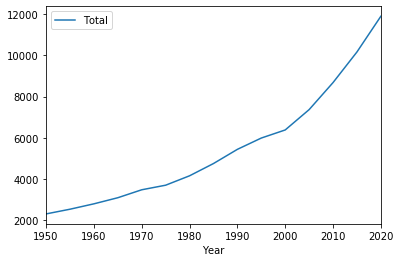

In [27]:
df1.plot(legend=True, label='Burundi')

In [28]:
#Let's look at just the year 2020 for all countries, and only at ages by larger groups

dff_2020 = dff[dff['Year'] == 2020]
dfm_2020 = dfm[dfm['Year'] == 2020]
dfa_2020 = dfa[dfa['Year'] == 2020]

In [29]:
# Let's also only use a few of the age groupings
# Keepers:  'Total', '0-24', '25-49', '50+', '60+', '65+', '70+', '75+', '80+', '85+', '90+'

drop_cols = ['0-1', '0-4', '0-14', '0-17', '0-19',
       '3-4', '3-5', '3-6', '4-5', '4-6', '5-10', '5-11', '5-14',
       '6-9', '6-10', '6-11', '6-12', '7-10', '7-12', '11-16', '11-17',
       '11-18', '12-14', '12-16', '12-17', '12-18', '13-17', '13-18', '13-19',
       '15+', '15-17', '15-24', '15-49', '15-59', '15-64', '16+', '17+', '18+',
       '18-23', '20+', '20-64', '20-69', '21+', '25+', '25-64',
       '25-69']

dff.drop(drop_cols,axis=1,inplace=True)
dfm.drop(drop_cols,axis=1,inplace=True)
dfa.drop(drop_cols,axis=1,inplace=True)
dff.head()

,Country,Country code,Type,Year,Total,0-24,25-49,50+,60+,65+,70+,75+,80+,85+,90+
390,Burundi,108,Country/Area,1950,1203,709,355,139,67,42,23,10,3,1,0
391,Burundi,108,Country/Area,1955,1317,786,380,152,71,45,25,12,4,1,0
392,Burundi,108,Country/Area,1960,1447,874,407,167,78,47,27,13,5,1,0
393,Burundi,108,Country/Area,1965,1595,977,434,183,87,53,29,14,5,1,0
394,Burundi,108,Country/Area,1970,1788,1123,464,202,97,60,33,15,6,2,0


In [30]:
dfa.head()

,Country,Country code,Type,Year,Total,0-24,25-49,50+,60+,65+,70+,75+,80+,85+,90+
390,Burundi,108,Country/Area,1950,2309,1383,673,252,120,75,41,18,6,2,0
391,Burundi,108,Country/Area,1955,2537,1543,721,273,125,78,43,20,7,2,0
392,Burundi,108,Country/Area,1960,2798,1724,774,300,137,82,46,21,8,2,0
393,Burundi,108,Country/Area,1965,3094,1936,828,330,153,92,49,23,8,2,0
394,Burundi,108,Country/Area,1970,3479,2229,887,363,170,104,56,25,9,3,0


In [31]:
# Now, all of the older groups are double counting (and worse), so we'll need to clean that up
# For example, 80+ includes 80 and also 90+, so we need to work backward and subtract

# TODO: Refactor this ...this is repeated and thus probably the hard way to do this!
dfa['80-89'] = dfa['80+'] - dfa['90+']
dfa['70-79'] = dfa['70+'] - dfa['80+']
dfa['60-69'] = dfa['60+'] - dfa['70+']
dfa['50-59'] = dfa['50+'] - dfa['60+']

dfm['80-89'] = dfm['80+'] - dfm['90+']
dfm['70-79'] = dfm['70+'] - dfm['80+']
dfm['60-69'] = dfm['60+'] - dfm['70+']
dfm['50-59'] = dfm['50+'] - dfm['60+']

dff['80-89'] = dff['80+'] - dff['90+']
dff['70-79'] = dff['70+'] - dff['80+']
dff['60-69'] = dff['60+'] - dff['70+']
dff['50-59'] = dff['50+'] - dff['60+']

In [32]:
# Sanity check! Create a list of the tallies
tally = dfa['0-24'] + dfa['25-49'] + dfa['50-59'] + dfa['60-69'] + dfa['70-79'] + dfa['80-89'] + dfa['90+']
max(dfa['Total'] - tally)  # compare to the totals

1

In [33]:
dfa.head()

,Country,Country code,Type,Year,Total,0-24,25-49,50+,60+,65+,70+,75+,80+,85+,90+,80-89,70-79,60-69,50-59
390,Burundi,108,Country/Area,1950,2309,1383,673,252,120,75,41,18,6,2,0,6,35,79,132
391,Burundi,108,Country/Area,1955,2537,1543,721,273,125,78,43,20,7,2,0,7,36,82,148
392,Burundi,108,Country/Area,1960,2798,1724,774,300,137,82,46,21,8,2,0,8,38,91,163
393,Burundi,108,Country/Area,1965,3094,1936,828,330,153,92,49,23,8,2,0,8,41,104,177
394,Burundi,108,Country/Area,1970,3479,2229,887,363,170,104,56,25,9,3,0,9,47,114,193


In [34]:
dftest = dfa.copy()
dftest.head()

,Country,Country code,Type,Year,Total,0-24,25-49,50+,60+,65+,70+,75+,80+,85+,90+,80-89,70-79,60-69,50-59
390,Burundi,108,Country/Area,1950,2309,1383,673,252,120,75,41,18,6,2,0,6,35,79,132
391,Burundi,108,Country/Area,1955,2537,1543,721,273,125,78,43,20,7,2,0,7,36,82,148
392,Burundi,108,Country/Area,1960,2798,1724,774,300,137,82,46,21,8,2,0,8,38,91,163
393,Burundi,108,Country/Area,1965,3094,1936,828,330,153,92,49,23,8,2,0,8,41,104,177
394,Burundi,108,Country/Area,1970,3479,2229,887,363,170,104,56,25,9,3,0,9,47,114,193


In [35]:
drop_more = ['50+', '60+', '65+','70+', '75+', '80+', '85+']

In [36]:
#dftest.drop(drop_more,axis=1)

In [37]:
# Now drop the messy versions
drop_more = ['50+', '60+', '65+','70+', '75+', '80+', '85+']

dff.drop(drop_more,axis=1,inplace=True)
dfm.drop(drop_more,axis=1,inplace=True)
dfa.drop(drop_more,axis=1,inplace=True)

In [38]:
dfa.head()

,Country,Country code,Type,Year,Total,0-24,25-49,90+,80-89,70-79,60-69,50-59
390,Burundi,108,Country/Area,1950,2309,1383,673,0,6,35,79,132
391,Burundi,108,Country/Area,1955,2537,1543,721,0,7,36,82,148
392,Burundi,108,Country/Area,1960,2798,1724,774,0,8,38,91,163
393,Burundi,108,Country/Area,1965,3094,1936,828,0,8,41,104,177
394,Burundi,108,Country/Area,1970,3479,2229,887,0,9,47,114,193


In [39]:
# Re-order the columns
dfa = dfa[['Country','Country code','Type','Year','Total','0-24','25-49','50-59','60-69','70-79','80-89','90+']]
dff = dff[['Country','Country code','Type','Year','Total','0-24','25-49','50-59','60-69','70-79','80-89','90+']]
dfm = dfm[['Country','Country code','Type','Year','Total','0-24','25-49','50-59','60-69','70-79','80-89','90+']]

In [40]:
dff.head()

,Country,Country code,Type,Year,Total,0-24,25-49,50-59,60-69,70-79,80-89,90+
390,Burundi,108,Country/Area,1950,1203,709,355,72,44,20,3,0
391,Burundi,108,Country/Area,1955,1317,786,380,81,46,21,4,0
392,Burundi,108,Country/Area,1960,1447,874,407,89,51,22,5,0
393,Burundi,108,Country/Area,1965,1595,977,434,96,58,24,5,0
394,Burundi,108,Country/Area,1970,1788,1123,464,105,64,27,6,0


In [41]:
dfa_2020 = dfa[dfa['Year'] == 2020]
dfa_2020.columns

Index(['Country', 'Country code', 'Type', 'Year', 'Total', '0-24', '25-49',
       '50-59', '60-69', '70-79', '80-89', '90+'],
      dtype='object')

In [42]:
df3 = dfa_2020[dfa_2020['Country']=='Burundi'].drop(['Total','Country code'],axis=1)
df3.index = df3['Year']
df3.head()

,Country,Type,Year,0-24,25-49,50-59,60-69,70-79,80-89,90+
Year,,,,,,,,,,
2020,Burundi,Country/Area,2020,7641,3274,492,339,112,31,2


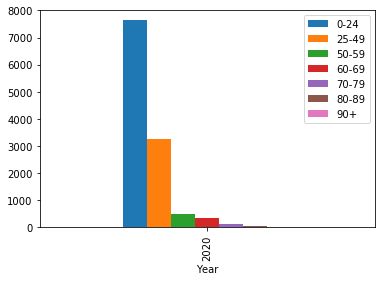

In [43]:
df3.plot(x='Year',kind='bar')

In [44]:
def plot_age_brackets(country:str):
    df3 = dfa_2020[dfa_2020['Country']==country].drop(['Total','Country code'],axis=1)
    df3.index = df3['Year']
    df3.plot(x='Year',kind='bar')

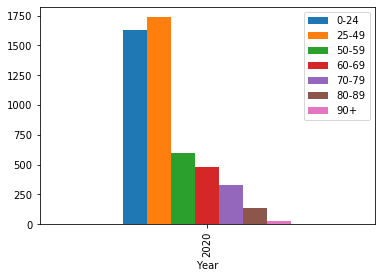

In [45]:
plot_age_brackets('Ireland')

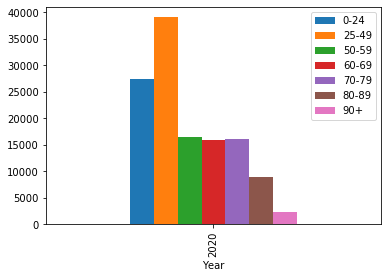

In [46]:
plot_age_brackets('Japan')

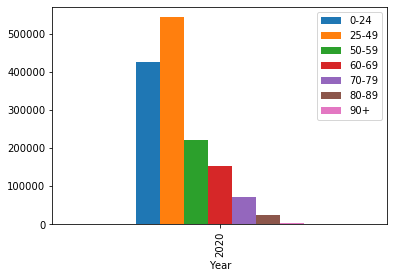

In [47]:
plot_age_brackets('China')